In [1]:
# import sys

# !{sys.executable} -m pip install -q gdown
# !{sys.executable} -m pip install -q pandas
# !{sys.executable} -m pip install -q scikit-learn
# !{sys.executable} -m pip install -q rasterio
# !{sys.executable} -m pip install -q matplotlib
# !{sys.executable} -m pip install -q albumentations
# !{sys.executable} -m pip install -q timm 
# !{sys.executable} -m pip install -q torch
# !{sys.executable} -m pip install -q tqdm 
# !{sys.executable} -m pip install -q opendatasets
# !{sys.executable} -m pip install -q kaggle
# !{sys.executable} -m pip install fastparquet
# !{sys.executable} -m pip install shap
# !pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [fastparquet]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 KB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 13.2 MB/s eta 0:00:00


In [4]:
# import gdown

# # link chia sẻ Google Drive (dạng share link)
# url = "https://drive.google.com/uc?id=1-4FkPgjgqiEFRxpr3Eoh2JLI0nfJMMbw"  # thay FILE_ID bằng id thực tế
# output = "bigearthnet_12band_10m.zip"

# # tải file về
# gdown.download(url, output, quiet=False)

# # giải nén
# import zipfile
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall("./data")  # giải nén vào ./data

In [6]:
# !mkdir -p ~/.kaggle
# !cp "kaggle.json" ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

In [7]:
# !kaggle datasets download -d nhanle03/bigearthnet-12band-10m-1

Dataset URL: https://www.kaggle.com/datasets/nhanle03/bigearthnet-12band-10m-1
License(s): apache-2.0
 99%|█████████████████████████████████████▌| 13.9G/14.1G [00:06<00:00, 2.91GB/s]
100%|██████████████████████████████████████| 14.1G/14.1G [00:06<00:00, 2.33GB/s]


In [8]:
# # giải nén
# import zipfile
# with zipfile.ZipFile("bigearthnet-12band-10m-1.zip", 'r') as zip_ref:
#     zip_ref.extractall("./data")  # giải nén vào ./data

In [9]:
# !kaggle datasets download -d nhanle03/bigearthnet-12band-10m

Dataset URL: https://www.kaggle.com/datasets/nhanle03/bigearthnet-12band-10m
License(s): apache-2.0
100%|█████████████████████████████████████▉| 13.8G/13.8G [00:05<00:00, 3.02GB/s]
100%|██████████████████████████████████████| 13.8G/13.8G [00:05<00:00, 2.94GB/s]


In [10]:
# # giải nén
# import zipfile
# with zipfile.ZipFile("bigearthnet-12band-10m.zip", 'r') as zip_ref:
#     zip_ref.extractall("./data")  # giải nén vào ./data

In [11]:
# # Tạo thư mục đích nếu chưa có
# !kaggle datasets download -d immulu/bigearthnetv2-reference-maps

# !mkdir -p ./lable_metadata

# # Giải nén chỉ 1 file: metadata.parquet
# !unzip bigearthnetv2-reference-maps.zip "metadata.parquet" -d ./lable_metadata

Dataset URL: https://www.kaggle.com/datasets/immulu/bigearthnetv2-reference-maps
License(s): Community Data License Agreement - Permissive - Version 1.0
 79%|███████████████████████████████▌        | 514M/651M [00:00<00:00, 2.69GB/s]
100%|████████████████████████████████████████| 651M/651M [00:00<00:00, 2.70GB/s]
Archive:  bigearthnetv2-reference-maps.zip
  inflating: ./lable_metadata/metadata.parquet  


In [12]:
# import shutil
# import os

# src = "data/content/bigearthnet_12band_10m_1"
# dst = "data/content/bigearthnet_12band_10m"

# # Di chuyển toàn bộ file từ src sang dst
# for file_name in os.listdir(src):
#     shutil.move(os.path.join(src, file_name), dst)

# # (Tuỳ chọn) Xoá thư mục rỗng
# os.rmdir(src)

In [13]:
# example_file = os.path.join(dst, "S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP",
#                             "S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_12band.tif")

# print("Tồn tại file:", os.path.exists(example_file))

Tồn tại file: True


In [14]:
import pandas as pd

# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = './lable_metadata/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [15]:
df["labels"][15]

['Arable land',
 'Broad-leaved forest',
 'Inland waters',
 'Pastures',
 'Urban fabric']

In [16]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")


Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [17]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = './lable_metadata/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')


                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [18]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [19]:
import os

# Đường dẫn thư mục chứa ảnh đa phổ đã xử lý
data_dir = "data/content/bigearthnet_12band_10m"

class_counts = {}
total_images = 0

for label in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, label)
    if os.path.isdir(class_path):
        n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
        class_counts[label] = n_files
        total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class:")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class:
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB: 8165 ảnh
Cl

In [20]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

Shape của ảnh S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS_75_88_12band.tif: (12, 120, 120) (channels, height, width)


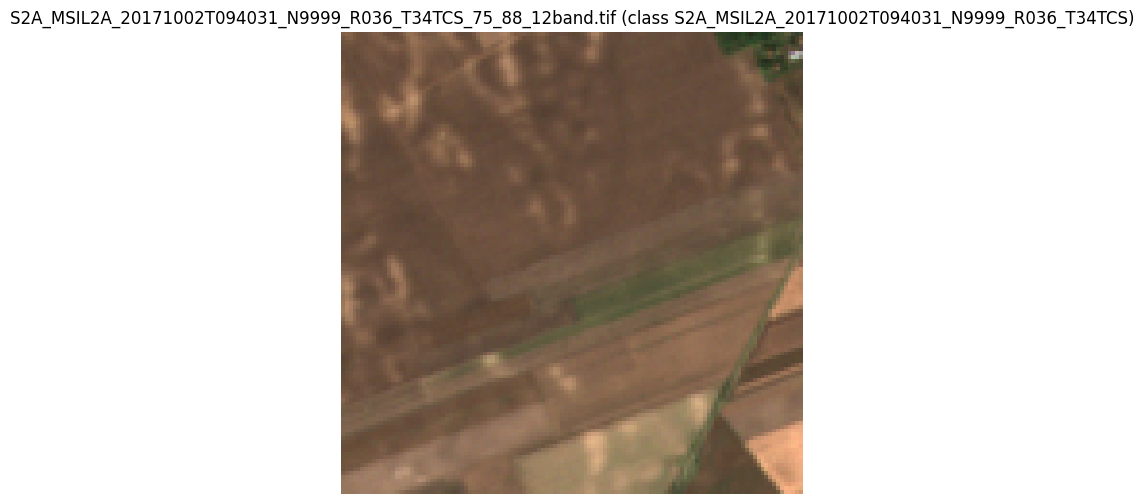

In [21]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()


In [22]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [23]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Đường dẫn gốc chứa các thư mục con
IMAGE_DIR = "data/content/bigearthnet_12band_10m"

# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet("./lable_metadata/metadata.parquet")

# 3. Duyệt toàn bộ ảnh trong thư mục con, tạo ánh xạ patch_id → đường dẫn ảnh
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 4. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 5. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 6. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 7. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 8. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

df.head()

Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow,image_path
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False,data/content/bigearthnet_12band_10m/S2A_MSIL2A...


In [24]:
train_list[0]

('data/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")


Số ảnh KHÔNG có metadata: 9718


In [26]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))


Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [27]:
import os
from glob import glob

# 1. Đường dẫn thư mục ảnh
IMAGE_DIR = "data/content/bigearthnet_12band_10m"

# 2. Lấy tất cả file .tif (ảnh 12 band) trong mọi thư mục con
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

# 3. Lấy patch_id từ tên file
tif_patch_ids = set(os.path.basename(p).replace('_12band.tif', '') for p in tif_paths)

# 4. Lấy patch_id từ metadata
import pandas as pd
df = pd.read_parquet("./lable_metadata/metadata.parquet")
metadata_patch_ids = set(df['patch_id'].tolist())

# 5. Tìm ảnh bị thiếu trong metadata
missing_patch_ids = tif_patch_ids - metadata_patch_ids

# 6. In số lượng và một vài ví dụ
print(f"Số ảnh .tif không có metadata: {len(missing_patch_ids)}")
print("Ví dụ các ảnh bị thiếu:")
for pid in list(missing_patch_ids)[:10]:
    print(f"- {pid}_12band.tif")


Số ảnh .tif không có metadata: 9718
Ví dụ các ảnh bị thiếu:
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_28_41_12band.tif
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_83_64_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_74_41_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_54_82_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_03_34_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_20_10_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_30_26_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_14_61_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_14_63_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_64_68_12band.tif


In [28]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])


/venv/main/lib/python3.10/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [29]:
from torch.utils.data import Dataset
import torch
import numpy as np
import rasterio  # dùng rasterio chứ không cần tifffile nếu bạn dùng .open()

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list  # List of (img_path, label_list)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (12, H, W) hoặc (13, H, W)

        # Giữ lại 3 bands
        bands_to_keep = [i for i in range(image.shape[0]) if i not in []]
        # bands_to_keep = [i for i in range(image.shape[0]) if i not in []]
        image = image[bands_to_keep, :, :]

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C)


        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)

        # Chuyển label thành Tensor float cho multi-label
        label = torch.tensor(label, dtype=torch.float32)

        return image, label

In [30]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 128

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [31]:
train_dataset[0][1].shape

torch.Size([19])

Label Tensor: tensor([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 6]
Non-zero class count: 3.0


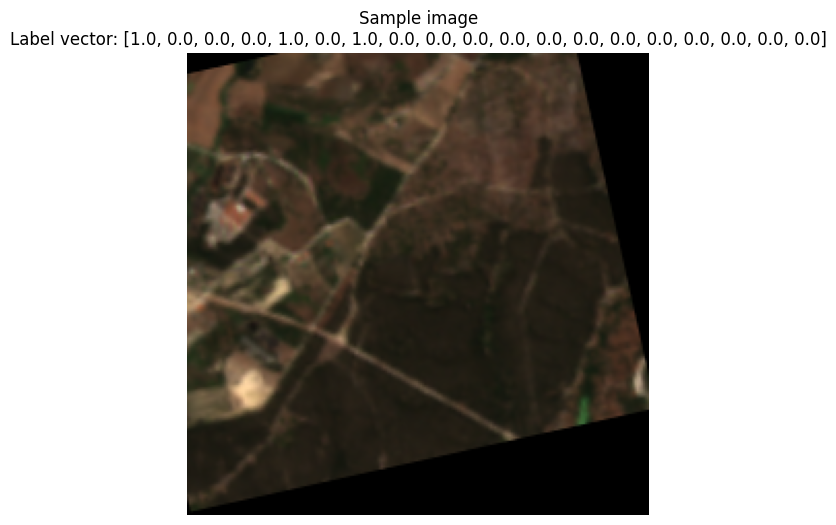

In [32]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[3]

# Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()


In [33]:
sample_img, sample_label = train_dataset[0]
print(f"Type image: {type(sample_img)}, shape: {getattr(sample_img, 'shape', None)}, dtype: {getattr(sample_img, 'dtype', None)}")
print(f"Type label: {type(sample_label)}, shape: {getattr(sample_label, 'shape', None)}, dtype: {getattr(sample_label, 'dtype', None)}")


Type image: <class 'torch.Tensor'>, shape: torch.Size([12, 224, 224]), dtype: torch.float32
Type label: <class 'torch.Tensor'>, shape: torch.Size([19]), dtype: torch.float32


In [36]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("⚡ Using device:", device)

model_path = "my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
model.to(device)

random_image = torch.rand((12, 224, 224), dtype=torch.float32, device=device)

with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    predicted = (output.squeeze() > 0.5).cpu().numpy()

print("Output sigmoid:\n", output.squeeze().cpu().numpy())
print("Predicted Labels:\n", predicted)


⚡ Using device: cuda
Output sigmoid:
 [6.1970548e-04 3.0772138e-04 4.2618977e-04 6.8827765e-04 3.2445748e-04
 3.3449344e-04 2.9672953e-04 1.3791649e-04 2.6791694e-04 7.4682850e-03
 9.9053103e-01 8.2254432e-05 1.1405765e-04 1.1203949e-04 1.1654822e-04
 3.0689112e-05 1.1845067e-04 3.4318757e-05 1.5771262e-05]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]


⚡ Using device: cuda
🔎 Đang tìm 500 ảnh mà model dự đoán có class 0...
🔹 Calculating SHAP values in batches of 10 ...


100%|██████████| 50/50 [16:56<00:00, 20.34s/it]


shap_array shape: (500, 12, 224, 224)
mean_total_signed shape: (12,)


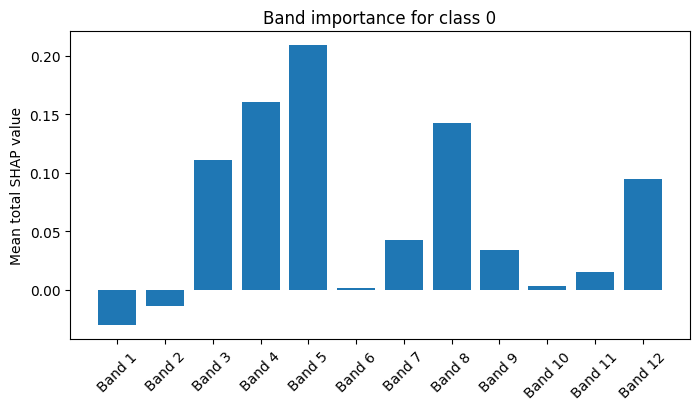

In [40]:
# -------------------------------
# Optimized SHAP Calculation
# -------------------------------

import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

# -------------------------------
# 1️⃣ Device
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("⚡ Using device:", device)

# -------------------------------
# 2️⃣ Wrapper model cho 1 class
# -------------------------------
class_idx = 0  # Thay class bạn muốn xem (0-18)

class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)
class_model.eval()

# -------------------------------
# 3️⃣ Background images
# -------------------------------
background_imgs = []
num_needed = 50  # giảm xuống để nhanh hơn

for imgs, labels in test_loader:
    mask = labels[:, class_idx] == 0
    selected_imgs = imgs[mask]
    background_imgs.append(selected_imgs)
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break

background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# -------------------------------
# 4️⃣ Chọn ảnh để explain
# -------------------------------
predicted_indices = []
num_explain = 200  # tổng số ảnh muốn explain

print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    if pred == 1:
        predicted_indices.append(idx)

    if len(predicted_indices) >= num_explain:
        break

if len(predicted_indices) < num_explain:
    print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# -------------------------------
# 5️⃣ Lấy ảnh và labels
# -------------------------------
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))
    test_labels_list.append(label)

test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

# -------------------------------
# 6️⃣ GradientExplainer
# -------------------------------
explainer = shap.GradientExplainer(class_model, background_imgs)

# -------------------------------
# 7️⃣ Tính SHAP với batch hóa
# -------------------------------
batch_size = 20  # tăng lên nếu GPU còn dư VRAM
shap_values_list = []

print(f"🔹 Calculating SHAP values in batches of {batch_size} ...")
for i in tqdm(range(0, len(test_imgs), batch_size)):
    batch_imgs = test_imgs[i:i+batch_size]
    shap_values_batch = explainer.shap_values(batch_imgs)
    shap_values_list.append(shap_values_batch)

shap_values = np.concatenate(shap_values_list, axis=0)
shap_array = np.squeeze(shap_values)
print("shap_array shape:", shap_array.shape)

# -------------------------------
# 8️⃣ Tổng SHAP theo band
# -------------------------------
total_shap = shap_array.sum(axis=(2, 3))  # sum H, W
mean_total_signed = total_shap.mean(axis=0)  # trung bình trên tất cả ảnh
print("mean_total_signed shape:", mean_total_signed.shape)

# -------------------------------
# 9️⃣ Vẽ bar chart
# -------------------------------
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()


In [44]:
def shap_vit(class_idx):
    # -------------------------------
    # Optimized SHAP Calculation
    # -------------------------------
    
    import torch
    import torch.nn as nn
    import shap
    import numpy as np
    import matplotlib.pyplot as plt
    from torch.utils.data import DataLoader
    from tqdm import tqdm
    import timm
    import random
    
    # -------------------------------
    # 1️⃣ Device
    # -------------------------------
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("⚡ Using device:", device)
    
    # -------------------------------
    # 2️⃣ Wrapper model cho 1 class
    # -------------------------------
    class_idx = class_idx  # Thay class bạn muốn xem (0-18)
    
    class MultiLabelModel(nn.Module):
        def __init__(self, base_model, class_idx):
            super().__init__()
            self.base_model = base_model
            self.class_idx = class_idx
    
        def forward(self, x):
            logits = self.base_model(x)
            return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)
    
    class_model = MultiLabelModel(model, class_idx).to(device)
    class_model.eval()
    
    # -------------------------------
    # 3️⃣ Background images
    # -------------------------------
    background_imgs = []
    num_needed = 50  # giảm xuống để nhanh hơn
    
    for imgs, labels in test_loader:
        mask = labels[:, class_idx] == 0
        selected_imgs = imgs[mask]
        background_imgs.append(selected_imgs)
        total_found = sum(img.shape[0] for img in background_imgs)
        if total_found >= num_needed:
            break
    
    background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)
    
    # -------------------------------
    # 4️⃣ Chọn ảnh để explain
    # -------------------------------
    predicted_indices = []
    num_explain = 200  # tổng số ảnh muốn explain
    
    print(f"🔎 Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")
    
    for idx in range(len(test_dataset)):
        img, _ = test_dataset[idx]
        img_batch = img.unsqueeze(0).to(device)
    
        with torch.no_grad():
            prob = model(img_batch)[0, class_idx].item()
            pred = int(prob > 0.5)
    
        if pred == 1:
            predicted_indices.append(idx)
    
        if len(predicted_indices) >= num_explain:
            break
    
    if len(predicted_indices) < num_explain:
        print(f"⚠️ Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")
    
    # -------------------------------
    # 5️⃣ Lấy ảnh và labels
    # -------------------------------
    test_imgs_list, test_labels_list = [], []
    for idx in predicted_indices:
        img, label = test_dataset[idx]
        test_imgs_list.append(img.unsqueeze(0))
        test_labels_list.append(label)
    
    test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
    test_labels = torch.stack(test_labels_list)
    
    # -------------------------------
    # 6️⃣ GradientExplainer
    # -------------------------------
    explainer = shap.GradientExplainer(class_model, background_imgs)
    
    # -------------------------------
    # 7️⃣ Tính SHAP với batch hóa
    # -------------------------------
    batch_size = 20  # tăng lên nếu GPU còn dư VRAM
    shap_values_list = []
    
    print(f"🔹 Calculating SHAP values in batches of {batch_size} ...")
    for i in tqdm(range(0, len(test_imgs), batch_size)):
        batch_imgs = test_imgs[i:i+batch_size]
        shap_values_batch = explainer.shap_values(batch_imgs)
        shap_values_list.append(shap_values_batch)
    
    shap_values = np.concatenate(shap_values_list, axis=0)
    shap_array = np.squeeze(shap_values)
    print("shap_array shape:", shap_array.shape)
    
    # -------------------------------
    # 8️⃣ Tổng SHAP theo band
    # -------------------------------
    total_shap = shap_array.sum(axis=(2, 3))  # sum H, W
    mean_total_signed = total_shap.mean(axis=0)  # trung bình trên tất cả ảnh
    print("mean_total_signed shape:", mean_total_signed.shape)
    
    # -------------------------------
    # 9️⃣ Vẽ bar chart
    # -------------------------------
    plt.figure(figsize=(8, 4))
    plt.bar(np.arange(1, 13), mean_total_signed)
    plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
    plt.ylabel('Mean total SHAP value')
    plt.title(f'Band importance for class {class_idx}')
    plt.show()

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 1...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:41<00:00, 40.14s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


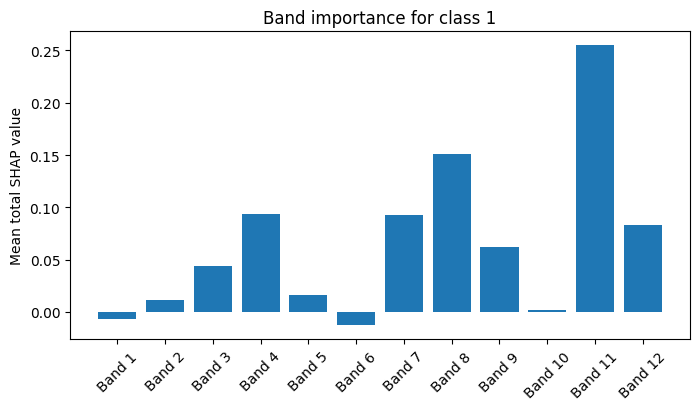

In [45]:
shap_vit(1)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 2...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:38<00:00, 39.85s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


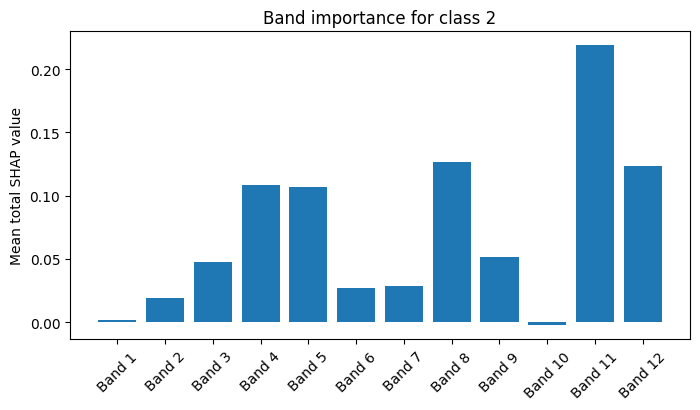

In [46]:
shap_vit(2)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 3...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:40<00:00, 40.08s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


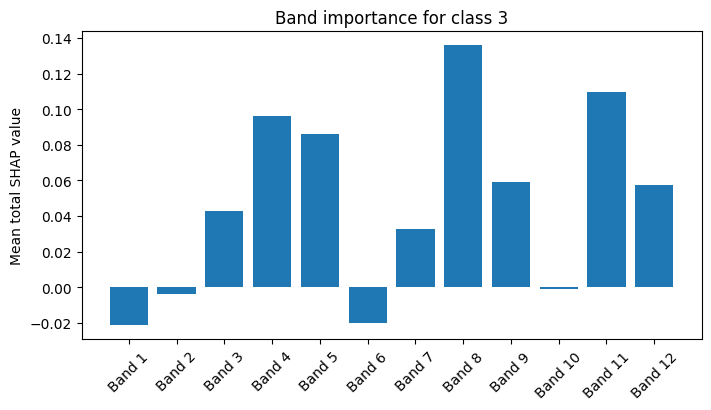

In [47]:
shap_vit(3)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 4...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:46<00:00, 40.65s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


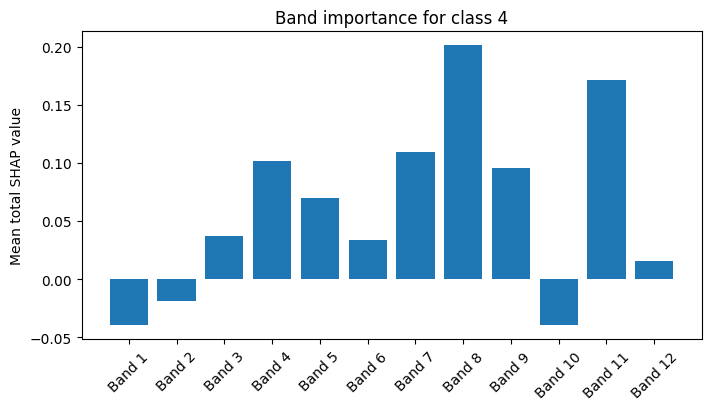

In [48]:
shap_vit(4)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 5...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:52<00:00, 41.22s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


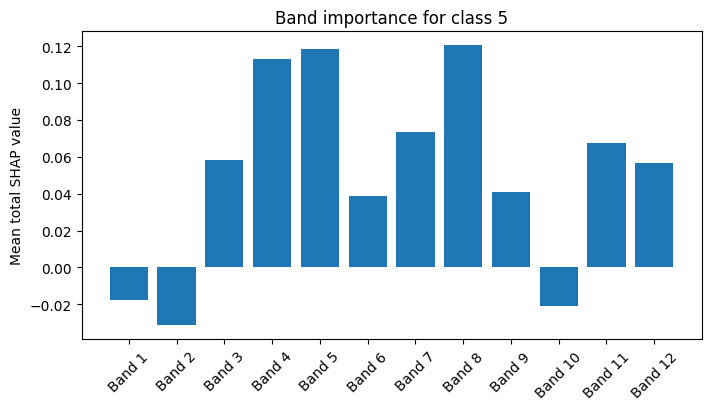

In [49]:
shap_vit(5)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 6...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:43<00:00, 40.32s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


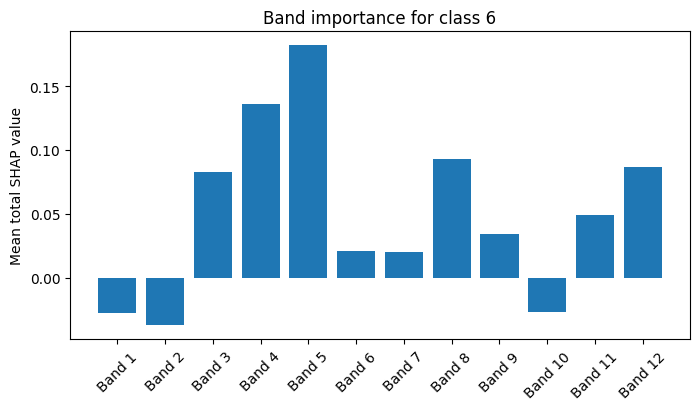

In [50]:
shap_vit(6)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 7...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:51<00:00, 41.11s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


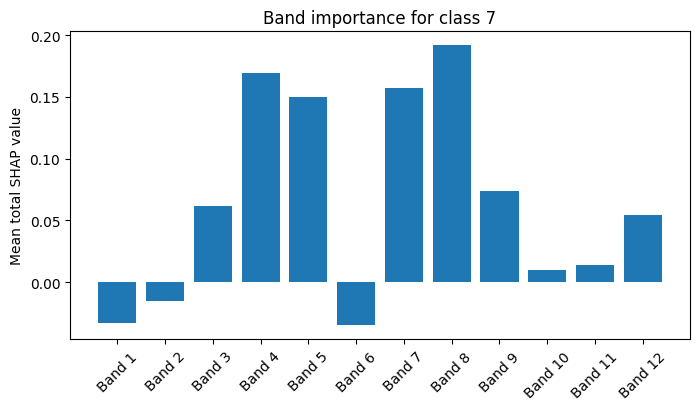

In [51]:
shap_vit(7)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 8...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:35<00:00, 39.60s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


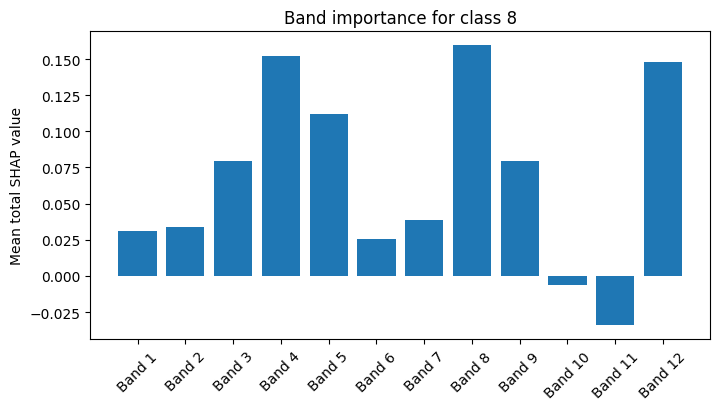

In [52]:
shap_vit(8)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 9...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:43<00:00, 40.37s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


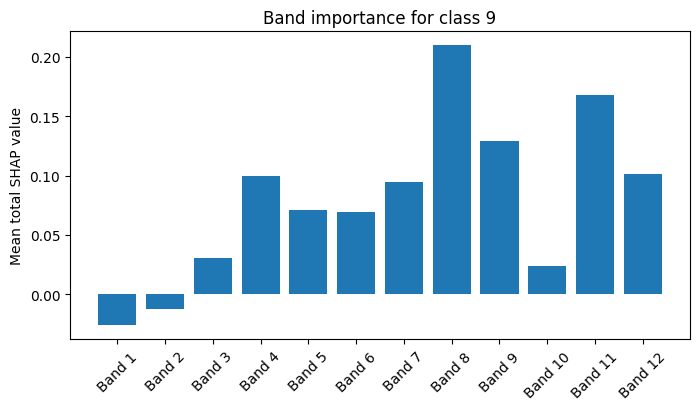

In [53]:
shap_vit(9)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 10...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:39<00:00, 39.94s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


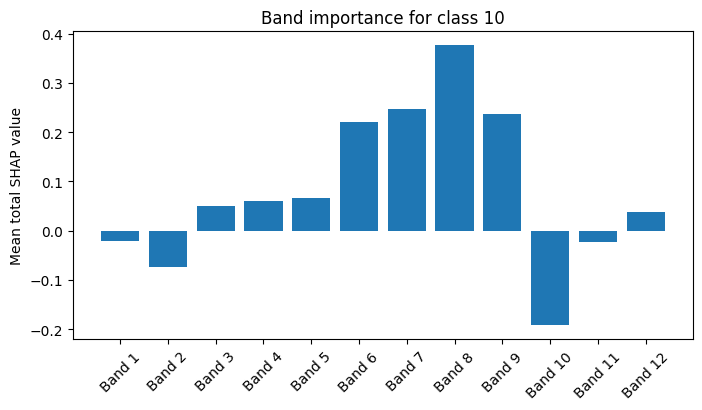

In [54]:
shap_vit(10)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 11...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:39<00:00, 39.91s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


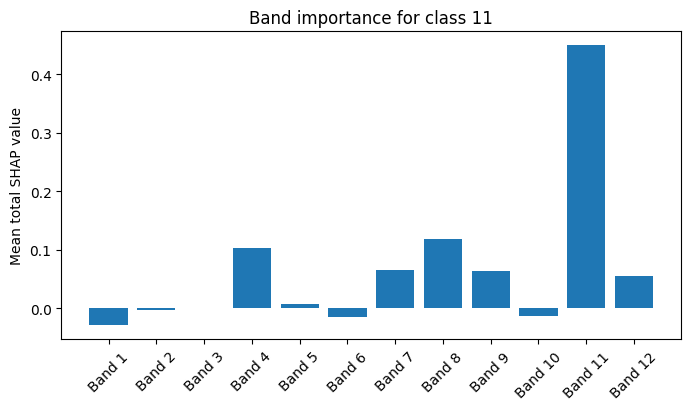

In [55]:
shap_vit(11)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 12...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:36<00:00, 39.65s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


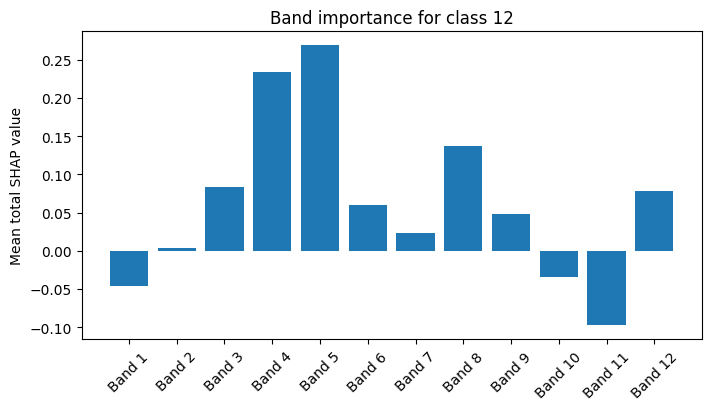

In [56]:
shap_vit(12)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 13...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:32<00:00, 39.22s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


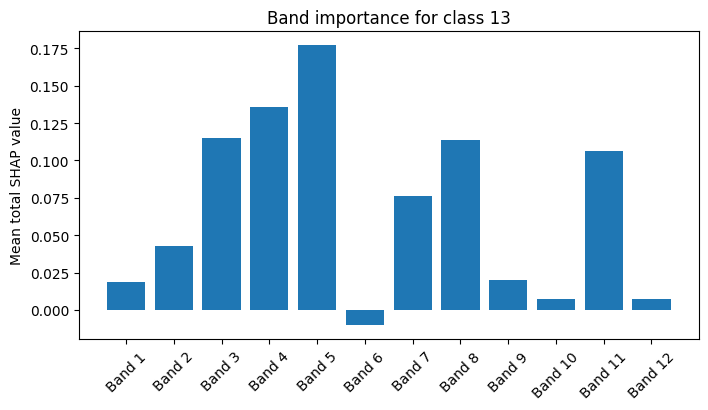

In [57]:
shap_vit(13)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 14...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:41<00:00, 40.13s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


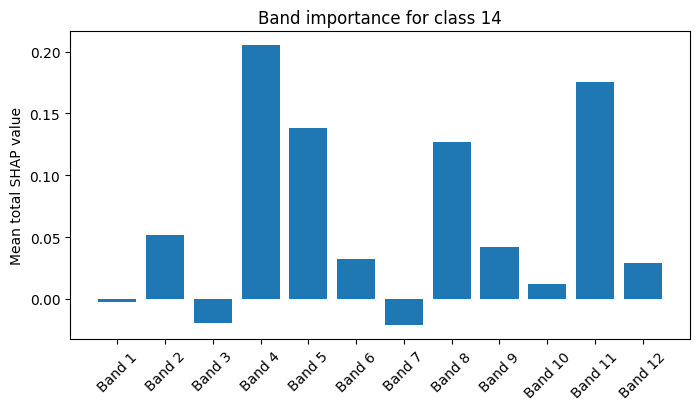

In [58]:
shap_vit(14)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 15...
⚠️ Chỉ tìm được 102 ảnh, sẽ tiếp tục với số lượng này.
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 6/6 [03:24<00:00, 34.06s/it]


shap_array shape: (102, 12, 224, 224)
mean_total_signed shape: (12,)


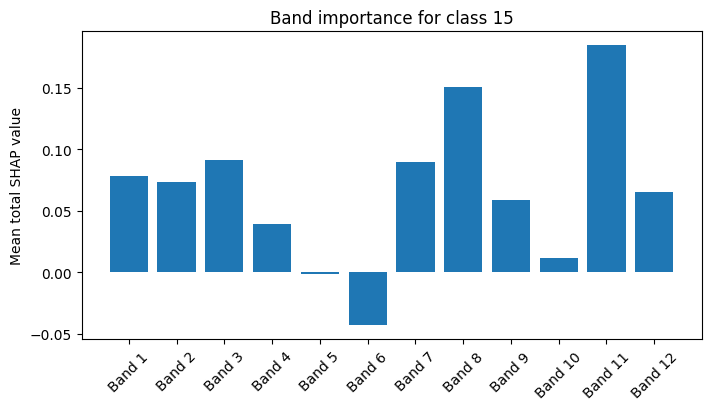

In [59]:
shap_vit(15)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 16...
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 10/10 [06:42<00:00, 40.21s/it]


shap_array shape: (200, 12, 224, 224)
mean_total_signed shape: (12,)


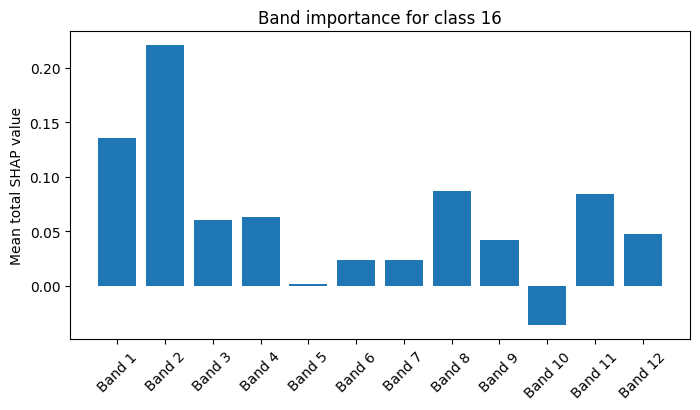

In [60]:
shap_vit(16)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 17...
⚠️ Chỉ tìm được 71 ảnh, sẽ tiếp tục với số lượng này.
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 4/4 [02:23<00:00, 35.82s/it]

shap_array shape: (71, 12, 224, 224)
mean_total_signed shape: (12,)


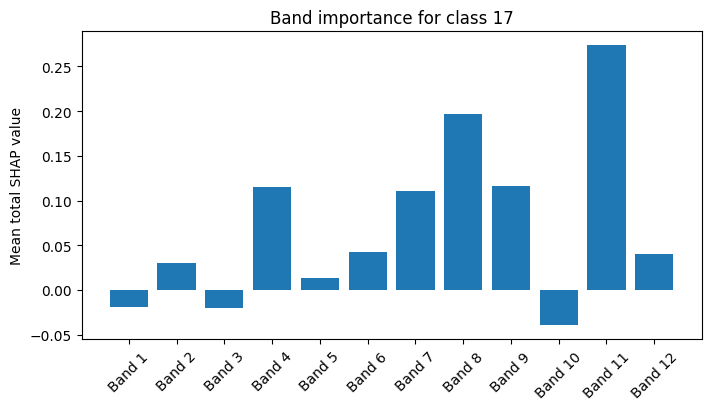

In [61]:
shap_vit(17)

⚡ Using device: cuda
🔎 Đang tìm 200 ảnh mà model dự đoán có class 18...
⚠️ Chỉ tìm được 48 ảnh, sẽ tiếp tục với số lượng này.
🔹 Calculating SHAP values in batches of 20 ...


100%|██████████| 3/3 [01:42<00:00, 34.30s/it]

shap_array shape: (48, 12, 224, 224)
mean_total_signed shape: (12,)


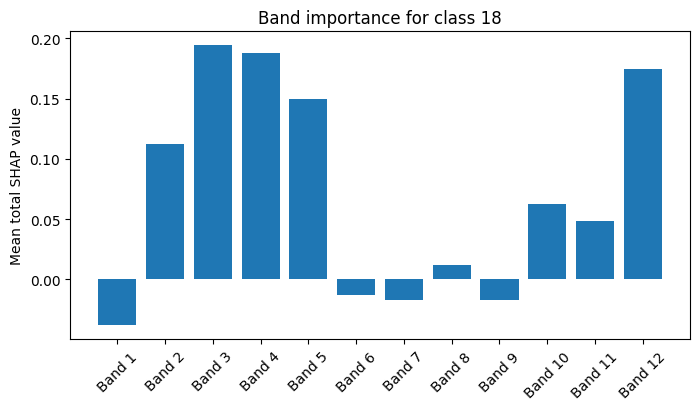

In [62]:
shap_vit(18)